## 회귀
- 소득이 증가하면 소비도 증가, 어떤 변수가 다른 변수에 영향을 준다면 두 변수 사이에 선형관계가 있다고 할 수 있음.
- 두 변수 사이에 일대일로 대응되는 확률적, 통계적 상관성을 찾는 알고리즘을 Simple Linear Regression(단순선형회귀)이라고 함
- 변수 X, Y에 대한 정보를 가지고 일차 방정식의 계수 a,b를 찾는 과정이 단순회귀분석 알고리즘

## 회귀 평가 지표
- MAE : 실제값과 예측값의 차이를 절대값으로 변환해 평균한 것
- MSE : 실제값과 예측값의 차이를 제곱해 평균한 것
- RMSE : MSE에 루트를 씌운 것(실제 오류 평균보다 커지는 것을 보정)
- R square : 분산 기반으로 예측 성능을 평가, 실제값의 분산 대비 예측값의 분산 비율을 지표로 함
 - 1에 가까울 수록 예측 정확도가 높음. 예측값 Variance / 실제값 Variance (Variance=분산)
 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel("./dataset/auto-mpg.xlsx")
ndf = df[['mpg','cylinders','horsepower','weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449


In [4]:
ndf.horsepower.unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

In [5]:
ndf.horsepower

0      130
1      165
2      150
3      150
4      140
      ... 
393     86
394     52
395     84
396     79
397     82
Name: horsepower, Length: 398, dtype: object

In [6]:
ndf['horsepower'].replace("?",np.nan,inplace=True)
ndf['horsepower']= ndf['horsepower'].astype('float')
print(ndf['horsepower'].dtype)

float64


In [7]:
ndf.dropna(subset=['horsepower'],axis=0,inplace=True)

In [8]:
ndf.horsepower.unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
       100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,  65.,
        69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137., 158.,
       167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,  78.,
        52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,  81.,
        79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,  48.,
        66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62., 132.,
        84.,  64.,  74., 116.,  82.])

In [9]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   horsepower  392 non-null    float64
 3   weight      392 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.3 KB


In [10]:
ndf.to_pickle('./dataset/auto-mpg.pkl')

In [11]:
ndf.convert_dtypes()

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449
...,...,...,...,...
393,27.0,4,86,2790
394,44.0,4,52,2130
395,32.0,4,84,2295
396,28.0,4,79,2625


In [12]:
X = ndf[['weight']]
y = ndf['mpg']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                   test_size = 0.3,
                                                   random_state = 11)


<AxesSubplot:title={'center':'Regplot'}, xlabel='weight', ylabel='mpg'>

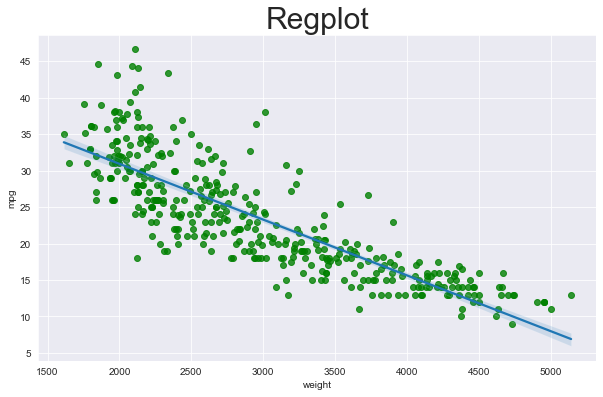

In [13]:
sns.set_style('darkgrid')
fig,axes = plt.subplots(1,1,figsize=(10,6))
plt.title('Regplot',fontsize=30)
sns.regplot(x='weight',y='mpg',data=ndf,scatter_kws={'color':'green'})


In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)

In [15]:
y_preds

array([29.27985295, 25.65957977, 27.90795996, 24.97363328, 15.02740907,
       16.26973439, 14.22713816, 25.60622838, 31.37580058, 25.24039025,
       29.77525875, 16.47551834, 12.13119053, 30.34688083, 18.19038459,
       30.23255642, 27.83174368, 21.96309032, 10.62210824, 27.64120299,
       24.7068763 , 17.18432972, 27.8927167 , 21.33049522, 10.15718895,
       29.18839342, 27.71741926, 29.05882575, 18.38092528, 20.36254849,
       31.20812477, 17.58065437,  7.88594388, 31.20812477, 14.8978414 ,
       26.15498558, 14.41005723, 23.525524  , 29.42466388, 24.63066003,
       29.00547435, 21.9021173 , 30.33925921, 30.8041785 , 26.04066116,
       29.52374504, 14.31097606, 30.70509734, 15.9420044 , 28.17471693,
       26.80282393, 19.86714269, 28.06039251, 24.4020112 , 29.88958317,
       27.45066229, 20.41589989, 21.63536032, 21.50579265, 23.0834696 ,
       15.16459837, 31.07093547, 30.95661105, 20.32444035,  8.20605224,
       24.82882235, 25.62147163, 14.03659747, 26.11687744, 27.42

In [16]:
X_test

,weight
240,2190
390,2665
391,2370
236,2755
222,4060
...,...
190,4215
152,3264
125,3102
105,4654


In [17]:
# weight의 값과 mpg의 값의 차이가 많이나서 차이가 있다.
print('f 기울기:{lr.coef_}')

f 기울기:{lr.coef_}


In [18]:
# 절편
print(f' 절편:{lr.intercept_}')

 절편:45.971217704757684


In [19]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)  # sqrt 스퀘어 루트(루트를 씀)
r_square = r2_score(y_test,y_preds)
print(f'mse: {mse},rmse:{rmse},r_square:{r_square,4}')

mse: 22.168955157340807,rmse:4.70839199274453,r_square:(0.6410608728212728, 4)


<AxesSubplot:xlabel='mpg', ylabel='Density'>

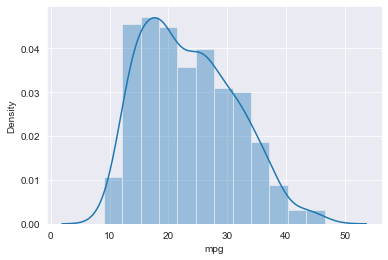

In [20]:
sns.distplot(y,kde=True)

<AxesSubplot:ylabel='Density'>

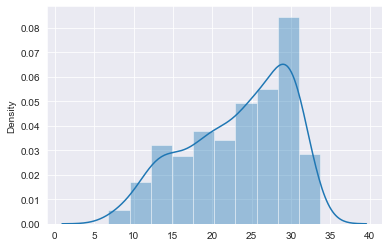

In [21]:
#kde는 밀도함수
y_hat = lr.predict(X)
sns.distplot(y_hat,kde=True)

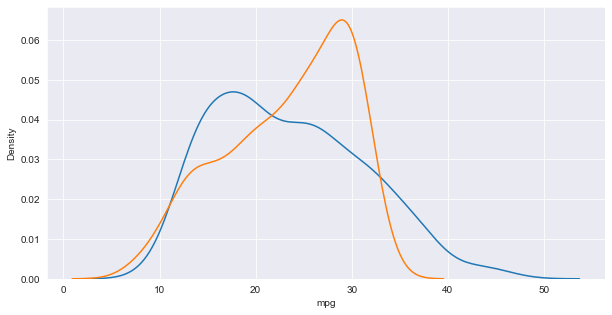

In [22]:
plt.figure(figsize=(10,5))
ax1 = sns.distplot(y,hist=False,label='y')
ax2 = sns.distplot(y_hat,hist=False,label='y_hat')
plt.show()
plt.close()

## 다항 회귀분석
 - 직선보다 곡선으로 설명하는 것이 적합할 경우 다항 함수를 사용하면 복잡한 곡성 형태의 회귀선을 표현할 수 있음
 - 2차 함수 이상의 다항 함수를 이용하여 두 변수간의 선형관계를 설명하는 알고리즘
 - 다항회귀도 선형회귀임. 선형/비선형 회귀를 나누는 기준은 회귀계수가 선형/비선형인지에 따르며 독립변수의 선형/비선형 여부와는 무관

In [23]:
X_train.shape

(274, 1)

In [24]:
from sklearn.preprocessing import PolynomialFeatures  #다항식 변환

In [25]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

print(X_train.shape)
print(X_train_poly.shape)

(274, 1)
(274, 3)


In [26]:
X_train_poly[:5]

array([[1.0000000e+00, 2.1200000e+03, 4.4944000e+06],
       [1.0000000e+00, 4.4990000e+03, 2.0241001e+07],
       [1.0000000e+00, 1.8450000e+03, 3.4040250e+06],
       [1.0000000e+00, 2.0450000e+03, 4.1820250e+06],
       [1.0000000e+00, 1.9850000e+03, 3.9402250e+06]])

In [27]:
# 차수 확인
poly.get_feature_names()

['1', 'x0', 'x0^2']

In [28]:
pr = LinearRegression()
pr.fit(X_train_poly,y_train)

X_test_poly = poly.fit_transform(X_test)
r_square = pr.score(X_test_poly,y_test)
r_square

0.6368479947378759

In [29]:
print(pr.coef_)
print(pr.intercept_)

[ 0.00000000e+00 -2.06207232e-02  2.03618732e-06]
65.122741427334


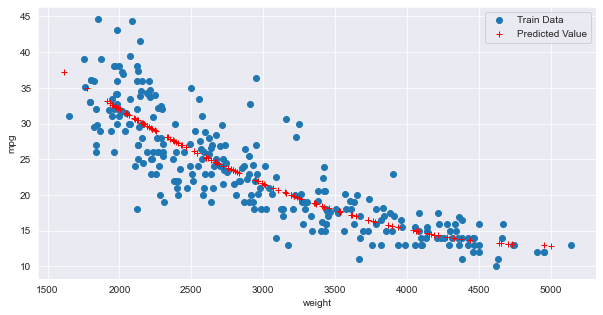

In [30]:
y_hat_test = pr.predict(X_test_poly)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train,y_train,'o',label='Train Data')
ax.plot(X_test,y_hat_test,'r+',label='Predicted Value')
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

In [31]:
# 0~1사이의 균일분포
import numpy as np
np.random.rand(100,1)

array([[0.8774057 ],
       [0.57467921],
       [0.94549721],
       [0.23248084],
       [0.70984435],
       [0.36020577],
       [0.77366799],
       [0.11779244],
       [0.39554027],
       [0.77002761],
       [0.3760186 ],
       [0.4691798 ],
       [0.08236169],
       [0.80194795],
       [0.29193245],
       [0.81835508],
       [0.13000895],
       [0.51072759],
       [0.99409072],
       [0.06048897],
       [0.22833697],
       [0.17891573],
       [0.38123668],
       [0.43504982],
       [0.12432614],
       [0.93613543],
       [0.73300037],
       [0.67657215],
       [0.02479656],
       [0.88976903],
       [0.01369285],
       [0.597778  ],
       [0.6521234 ],
       [0.75876739],
       [0.61577623],
       [0.39633246],
       [0.47578303],
       [0.23091883],
       [0.55041968],
       [0.11424258],
       [0.21136953],
       [0.22410239],
       [0.20766395],
       [0.35245964],
       [0.20456595],
       [0.55224161],
       [0.1614439 ],
       [0.474

In [32]:
# [과제] X 데이터를 X_poly 데이터셋으로 변환하여 2차함수로 만들어진 데이터셋을 예측하고 시각화하세요
import numpy as np
np.random.seed(42)
m=100
X= 6 * np.random.rand(m,1)-3
y = 0.5 * X**2 + X + 2 +np.random.randn(m,1)

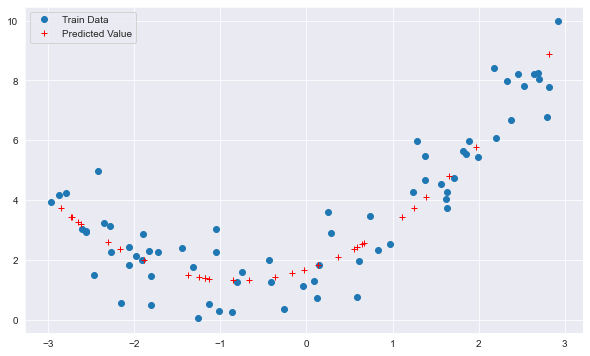

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 11)
# 2차 다항식으로 바꿈
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
# 훈련 및 학습
lr = LinearRegression()
lr.fit(X_train_poly,y_train)
y_preds = lr.predict(X_test_poly)
# 시각화
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train,y_train,'o',label='Train Data')
ax.plot(X_test,y_preds,'r+', label='Predicted Value')
ax.legend(loc='best')
plt.show()
plt.close()


In [34]:
poly.get_feature_names()

['1', 'x0', 'x0^2']

## 다중 회귀분석
 - 여러 개의 독립변수가 종속변수에 영향을 주고 선형관계를 갖는 경우에 다중회귀분석을 사용
 - 다중 회귀분석 알고리즘은 각 독립 변수의 계수와 상수항에 적절한 겂들을 찾아서 모형을 완성

In [35]:
df = pd.read_pickle('./dataset/auto-mpg.pkl')
df.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436
3,16.0,8,150.0,3433
4,17.0,8,140.0,3449


In [36]:
X = df.drop('mpg',axis=1)
y = df['mpg']
#독립변수가 여러개 (mpg만 놔둠)
X.shape


(392, 3)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=10)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
r_square = lr.score(X_test,y_test)
round(r_square,4)

0.6939

In [38]:
# Q. mse, rmse, r_square(r2_score), 기울기, 절편

In [39]:
# 

In [40]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)  # sqrt 스퀘어 루트(루트를 씀)
r_square = r2_score(y_test,y_preds)
print(f'mse: {mse},rmse:{rmse},r_square:{r_square,4}')

mse: 17.33008562898996,rmse:4.162941943985042,r_square:(0.6939048496695597, 4)


In [41]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)

In [42]:
X_test

,cylinders,horsepower,weight
243,3,110.0,2720
371,4,84.0,2525
300,8,90.0,3420
345,4,60.0,1760
265,8,140.0,4080
...,...,...,...
384,4,67.0,1965
20,4,87.0,2672
189,8,120.0,3962
60,4,90.0,2408


<AxesSubplot:title={'center':'Regplot'}, xlabel='weight', ylabel='mpg'>

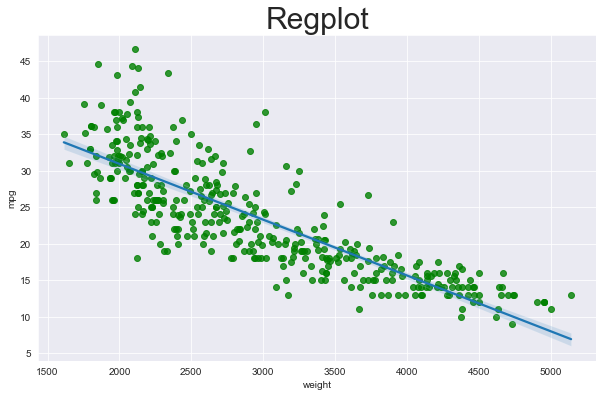

In [43]:
sns.set_style('darkgrid')
fig,axes = plt.subplots(1,1,figsize=(10,6))
plt.title('Regplot',fontsize=30)
sns.regplot(x='weight',y='mpg',data=ndf,scatter_kws={'color':'green'})

<AxesSubplot:title={'center':'Regplot'}, xlabel='cylinders', ylabel='mpg'>

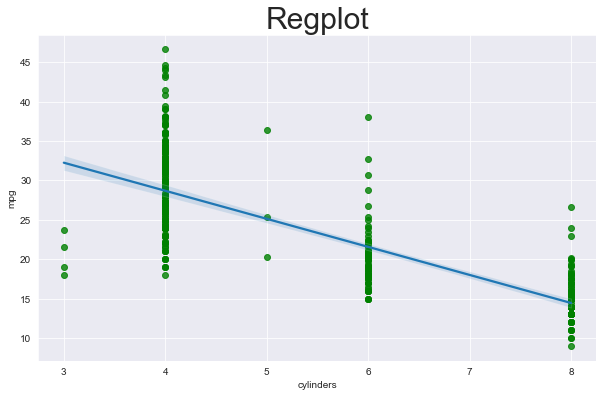

In [44]:
sns.set_style('darkgrid')
fig,axes = plt.subplots(1,1,figsize=(10,6))
plt.title('Regplot',fontsize=30)
sns.regplot(x='cylinders',y='mpg',data=ndf,scatter_kws={'color':'green'})

<AxesSubplot:title={'center':'Regplot'}, xlabel='horsepower', ylabel='mpg'>

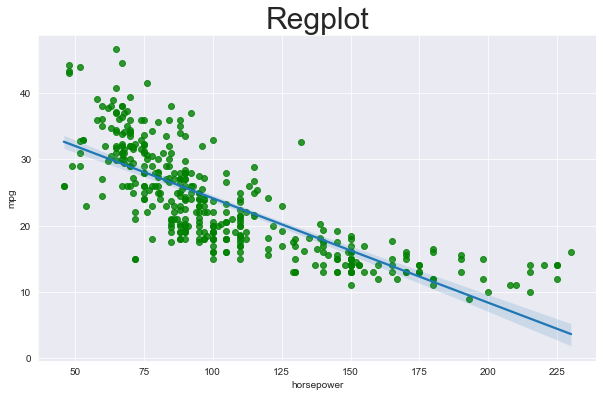

In [45]:
sns.set_style('darkgrid')
fig,axes = plt.subplots(1,1,figsize=(10,6))
plt.title('Regplot',fontsize=30)
sns.regplot(x='horsepower',y='mpg',data=ndf,scatter_kws={'color':'green'})

In [1]:
print(f' 기울기:{lr.coef_}')

NameError: name 'lr' is not defined

In [47]:
print(f' 절편:{lr.intercept_}')

 절편:46.41435126963407


In [48]:
#[과제] y_test,y_hat을 하나의 그래프로 비교하여 시각화하세요

<AxesSubplot:xlabel='mpg', ylabel='Density'>

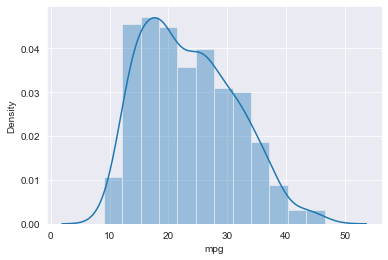

In [49]:
sns.distplot(y,kde=True)

<AxesSubplot:ylabel='Density'>

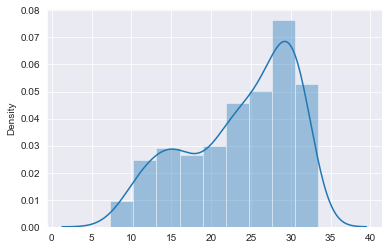

In [50]:
y_hat = lr.predict(X)
sns.distplot(y_hat,kde=True)

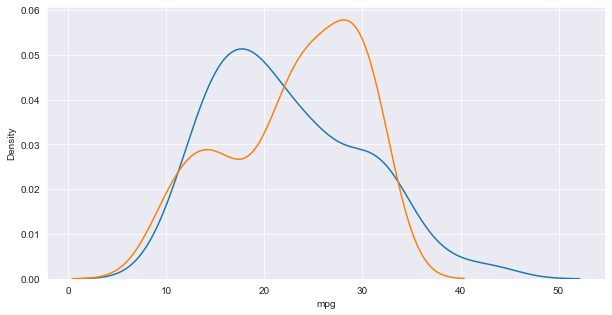

In [51]:
plt.figure(figsize=(10,5))
ax1 = sns.distplot(y_test,hist=False,label='y_test')
ax2 = sns.distplot(y_preds,hist=False,label='y_preds')
plt.show()
plt.close()

[과제] 아래 Boston 데이터 셋으로 보스턴 주택 가격 예측 모델을 만들고 평가하세요

In [52]:
from sklearn.datasets import load_boston

boston = load_boston()
boston_df = pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [53]:
import matplotlib.pyplot as plt

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

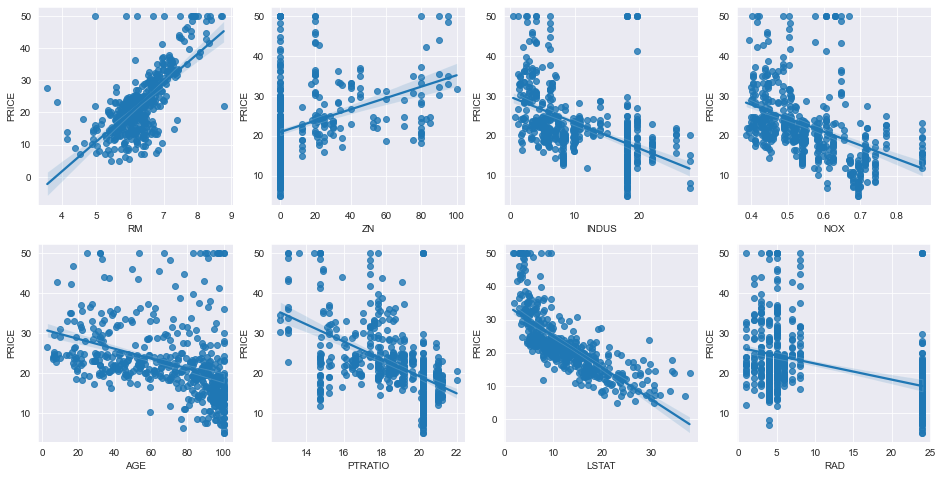

In [61]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features= ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(data = boston_df, x=feature, y='PRICE', ax=axs[row][col])

In [63]:
y_target = boston_df['PRICE']
x_data = boston_df.drop(['PRICE'],axis=1, inplace=False)
X_train, X_test,y_train, y_test = train_test_split(x_data,y_target,test_size=0.3,random_state=156)

lr = LinearRegression()
lr.fit(X_train,y_train)

y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
r_square = r2_score(y_test,y_preds)
# r_square : 설명력
print(f'mse: {mse},rmse:{rmse}')
print('Variance_score:{0:.3f}'.format(r2_score(y_test,y_preds)))

mse: 17.296915907902047,rmse:4.158956107955703
Variance_score:0.757


 - MAE : 실제값과 예측값의 차이를 절대값으로 변환해 평균한 것
 - MSE : 실제값과 예측값의 차이를 제곱해 평균한 것
 - RMSE : MSE에 루트를 씌운 것(실제 오류 평균보다 커지는 것을 보정)
 - R square : 분산 기반으로 예측 성능을 평가, 실제값의 분산 대비 예측값의 분산 비율을 지표로 함

In [ ]:
print('절편값:',lr.intercept_)
print('회귀 계수값:',np.round(lr.coef_,1))
# 회기계수를 구하기 위해서 계수값과 절편을 구한다

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
coeff = pd.Series(data=np.round(lr.coef_,1),index=x_data.columns)
coeff.sort_values(ascending=False)

In [ ]:
from sklearn.model_selection import cross_val_score

y_target = boston_df['PRICE']
x_data = boston_df.drop(['PRICE'],axis=1, inplace=False)
lr = LinearRegression()

neg_mse_scores = cross_val_score(lr,x_data,y_target,scoring="neg_mean_squared_error",cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))
print(' 5 folds 의 R2_square :')

In [ ]:
# 가격은 종속변수 나머지는 독립변수 (다항회귀식)